In [14]:
import os
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import train_test_split
import numpy as np
from PIL import Image

In [15]:
# Definisikan path ke folder dataset
image_path = 'balinese-mask'
dataset_path = 'dataset'
train_path = os.path.join(dataset_path, 'train')
valid_path = os.path.join(dataset_path, 'valid')
test_path = os.path.join(dataset_path, 'test')

In [16]:
# Baca nama folder (kelas) dan hitung jumlah gambar dalam setiap kelas
class_folders = os.listdir(image_path)
class_counts = []

for class_folder in class_folders:
    class_path = os.path.join(image_path, class_folder)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        class_counts.append((class_folder, num_images))

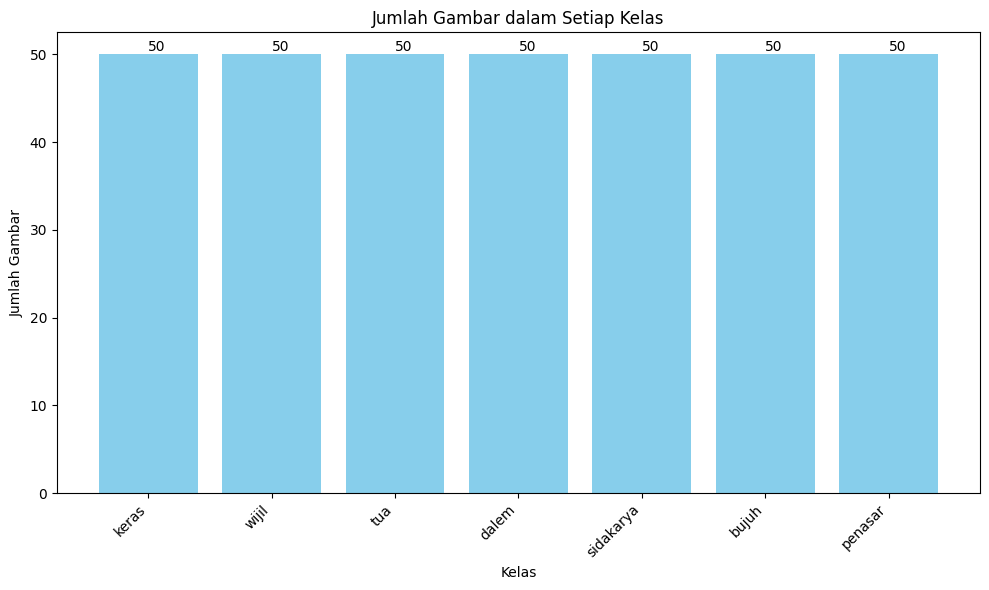

In [17]:
# Visualisasikan nama kelas beserta jumlah gambar dalam grafik
plt.figure(figsize=(10, 6))
bars = plt.bar([x[0] for x in class_counts], [x[1] for x in class_counts], color='skyblue')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Gambar')
plt.title('Jumlah Gambar dalam Setiap Kelas')

# Tambahkan label jumlah gambar pada setiap batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
# Fungsi untuk membersihkan folder train, valid, dan test sebelum menyalin gambar-gambar baru
def clean_folders():
    for folder in [train_path, valid_path, test_path]:
        if os.path.exists(folder):
            shutil.rmtree(folder)

In [19]:
# Bersihkan folder train, valid, dan test sebelum membagi gambar-gambar baru
clean_folders()

In [20]:
# Pastikan folder train, valid, dan test sudah ada
for path in [train_path, valid_path, test_path]:
    os.makedirs(path, exist_ok=True)

In [21]:
# Baca nama folder (kelas) di dalam image path
class_folders = os.listdir(image_path)
print(class_folders)

['keras', 'wijil', 'tua', 'dalem', 'sidakarya', 'bujuh', 'penasar']


In [22]:
# Bagi setiap gambar per kelas ke dalam folder train, valid, dan test di dalam dataset path
for class_folder in class_folders:
    class_path = os.path.join(image_path, class_folder)
    if os.path.isdir(class_path):
        # Baca semua file dalam folder kelas
        files = os.listdir(class_path)
        # Bagi file menjadi train, valid, test
        train_files, test_valid_files = train_test_split(files, test_size=0.4, random_state=42)
        valid_files, test_files = train_test_split(test_valid_files, test_size=0.5, random_state=42)
        
        # Simpan file ke dalam folder train, valid, test di dalam dataset path
        for file in train_files:
            src = os.path.join(class_path, file)
            dest = os.path.join(train_path, class_folder)
            os.makedirs(dest, exist_ok=True)
            shutil.copy(src, dest)
        for file in valid_files:
            src = os.path.join(class_path, file)
            dest = os.path.join(valid_path, class_folder)
            os.makedirs(dest, exist_ok=True)
            shutil.copy(src, dest)
        for file in test_files:
            src = os.path.join(class_path, file)
            dest = os.path.join(test_path, class_folder)
            os.makedirs(dest, exist_ok=True)
            shutil.copy(src, dest)

In [23]:
# Inisialisasi dictionary untuk menyimpan jumlah gambar per kelas di setiap folder
class_counts = {'train': {}, 'valid': {}, 'test': {}}

In [24]:
# Fungsi untuk menghitung jumlah gambar per kelas di suatu folder
def count_images_per_class(folder_path, folder_name):
    class_folders = os.listdir(folder_path)
    for class_folder in class_folders:
        class_path = os.path.join(folder_path, class_folder)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            class_counts[folder_name][class_folder] = num_images

In [25]:
# Hitung jumlah gambar per kelas di setiap folder
count_images_per_class(train_path, 'train')
count_images_per_class(valid_path, 'valid')
count_images_per_class(test_path, 'test')

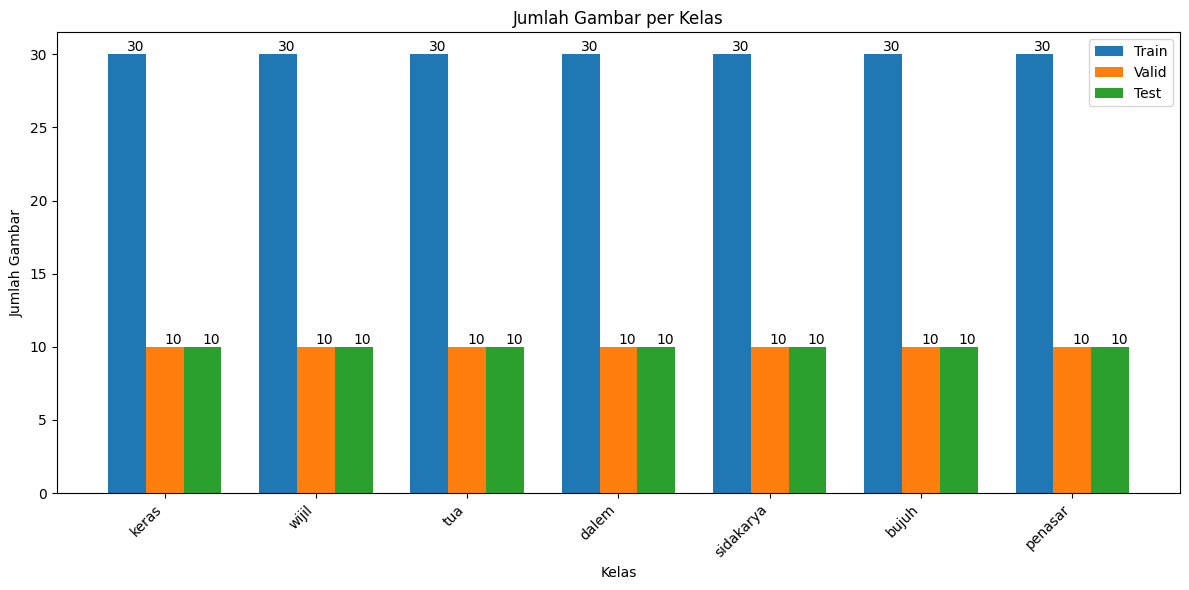

In [26]:
# Siapkan data untuk plot
classes = list(class_counts['train'].keys())
train_counts = list(class_counts['train'].values())
valid_counts = list(class_counts['valid'].values())
test_counts = list(class_counts['test'].values())

# Atur posisi bar untuk setiap kelas
bar_width = 0.25
index = np.arange(len(classes))

# Plot grafik
plt.figure(figsize=(12, 6))
bars_train = plt.bar(index, train_counts, bar_width, label='Train')
bars_valid = plt.bar(index + bar_width, valid_counts, bar_width, label='Valid')
bars_test = plt.bar(index + 2 * bar_width, test_counts, bar_width, label='Test')

# Menambahkan label jumlah gambar di atas setiap bar
for bars in [bars_train, bars_valid, bars_test]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')

plt.xlabel('Kelas')
plt.ylabel('Jumlah Gambar')
plt.title('Jumlah Gambar per Kelas')
plt.xticks(index + bar_width, classes, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

True dataset/train
True dataset/valid
True dataset/test


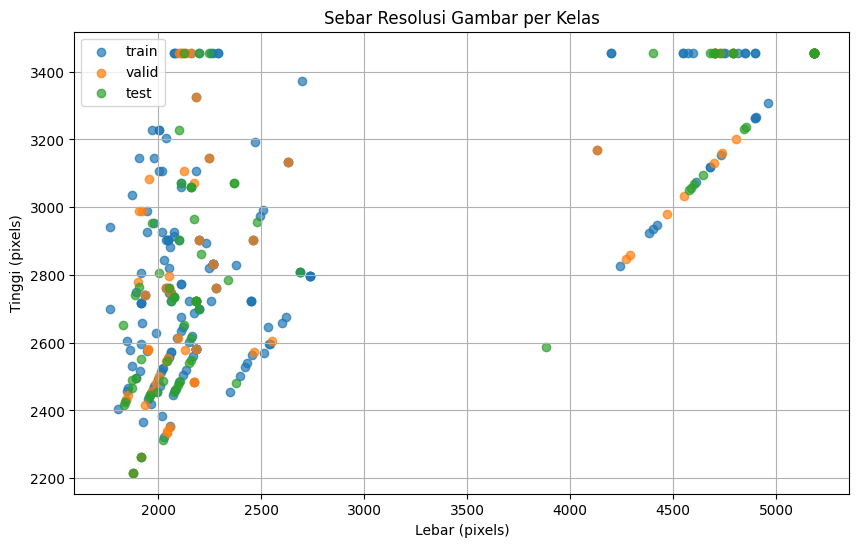

In [27]:
# Fungsi untuk mendapatkan resolusi gambar dalam satu kelas dan mengabaikan hidden files
def get_image_resolutions(class_folder):
    class_path = os.path.join(dataset_path, class_folder)
    resolutions = []
    if os.path.isdir(class_path):  # Pastikan itu adalah direktori
        print(os.path.isdir(class_path), class_path)
        for root, dirs, files in os.walk(class_path):
            for filename in files:
                if filename != '.DS_Store':  # Mengabaikan file .DS_Store
                    if filename.lower().endswith(('.jpg', '.png', '.jpeg')):  # Memeriksa ekstensi file
                        image_path = os.path.join(root, filename)
                        with Image.open(image_path) as img:
                            width, height = img.size
                            resolutions.append((width, height))
    return resolutions

# Ambil resolusi gambar per kelas
class_folders = ['train', 'valid', 'test']
class_resolutions = {}
for class_folder in class_folders:
    class_resolutions[class_folder] = get_image_resolutions(class_folder)

# Plot sebar resolusi gambar per kelas
plt.figure(figsize=(10, 6))
for class_folder, resolutions in class_resolutions.items():
    widths = [resolution[0] for resolution in resolutions]
    heights = [resolution[1] for resolution in resolutions]
    plt.scatter(widths, heights, label=class_folder, alpha=0.7)

plt.title('Sebar Resolusi Gambar per Kelas')
plt.xlabel('Lebar (pixels)')
plt.ylabel('Tinggi (pixels)')
plt.legend()
plt.grid(True)
plt.show()